# Importing Libraries

In [1]:
# importing libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from pathlib import Path
import xlrd
import seaborn as sns
import imblearn
from itertools import product
import datetime
from datetime import timedelta, datetime, date

from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, accuracy_score, roc_auc_score

In [3]:
import sklearn
print('sklearn version {}'.format(sklearn.__version__))

sklearn version 0.24.0


# Reading Data

## Extreme events dataframe

In [43]:
# Reading extreme events dataset
Extrm_data = pd.read_excel('/mnt/storage/Scratch/Fareeda/historical_ewes_tagged_202004241455_eventtiming.xlsx')
Extrm_data

,Event date,Event Title,Source,Nld,Ald,Wko,Bop,Gsb,Hby,Tki,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,1996-03-31 00:00:00,March 1996 Eastern North Island Ex-Tropical Cy...,NIWA,NaN,NaN,NaN,NaN,3R,3R;3W,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1996-07-01 00:00:00,July 1996 South Island Snowfall,NIWA,NaN,NaN,NaN,NaN,NaN,1S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996-07-11 00:00:00,July 1996 Northland Auckland Rainfall,MetService,3R,3R,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996-07-14 00:00:00,July 1996 Waikato Flooding,NIWA,NaN,NaN,3R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1996-08-01 00:00:00,August 1996 Northland Coromandel Rainfall,MetService,3R,NaN,3R,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,2019-12-03 00:00:00,December 2019 South Island Heavy Rain 1,MetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
837,2019-12-08 00:00:00,December 2019 South Island Heavy Rain 2,MetService,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
838,2019-12-16 00:00:00,December 2019 Waikato Convection,MetService,NaN,NaN,3C,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
839,2019-12-17 00:00:00,December 2019 Northern South Island Heavy Rain,MetService,NaN,3C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Dictionary of all regions

Dict ={ "Ald" :  "Auckland_1d.nc",
        "Bop" :  "Bay-of-Plenty_1d.nc",
        "Cny" :  "Canterbury_1d.nc",
        "Gsb" :  "Gisborne_1d.nc",
        "Hby" :  "Hawke's-Bay_1d.nc",
        #"Manawatu-Wanganui" : Manawatu-Wanganui_1d.nc,
        "Mrb" :    "Marlborough_1d.nc",
        #"Nelson" : Nelson_1d.nc,
        "Nld" :    "Northland_1d.nc",
        "Ota" :    "Otago_1d.nc",
        "Sld" :    "Southland_1d.nc",
        "Tki" :    "Taranaki_1d.nc",
        "Tas" :    "Tasman_1d.nc",
        "Wko" :    "Waikato_1d.nc",
        "Wgn" :    "Wellington_1d.nc",
        "Wst" :    "West-Coast_1d.nc"
    
       }

In [6]:
Extrm_data.columns

Index(['Event date', 'Event Title', 'Source', 'Nld', 'Ald', 'Wko', 'Bop',
       'Gsb', 'Hby', 'Tki', 'Hor', 'Wgn', 'Tas', 'Mrb', 'Wst', 'Cny', 'Ota',
       'Sld', 'Chi', 'Comments', 'Latitude Start', 'Latitude End',
       'Longitude Start', 'Longitude End', 'Event Start', 'Event End',
       'Max ARI', 'Event Duration', 'Unnamed: 28', 'Unnamed: 29',
       'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37'],
      dtype='object')

In [45]:
# Function to read array dataset and convert it into dataframe for each variable and region


def get_data(variable, Dict):
    data1 = pd.DataFrame()
    
    for region in Dict.values():
        
       # path of different variables data for each region 
        file_path = f'/mnt/temp/Projects/Emergence/Data_Keep/epe/ERA5_1d/{variable}/average/{region}'
        # Reading array dataset
        df = xr.open_dataset(file_path)
        # Converting array dataset into dataframe
        data = df.to_dataframe()
        data1 = data1.append(data)
    
    return data1
   

In [46]:
# To get temperature data and index for all regions
data_t = get_data('2T', Dict )
data_t


,data
time,
1996-01-01 00:00:00,293.979004
1996-01-01 01:00:00,294.516296
1996-01-01 02:00:00,294.518250
1996-01-01 03:00:00,294.480347
1996-01-01 04:00:00,293.989380
...,...
2020-04-30 19:00:00,279.661499
2020-04-30 20:00:00,280.655029
2020-04-30 21:00:00,280.895813


In [47]:
# Code to extract all regions, start event and event end columns

extm_data_frame = pd.DataFrame()

for reg in Extrm_data.iloc[:, 3:19]:
    #print(reg)
    region_rows = Extrm_data[[reg, 'Event Start', 'Event End', 'Event Duration']]
    region_null = region_rows.dropna()
    region_R = region_null.loc[region_null[reg].str.contains('R')]
    
    region_name = region_R.rename(columns={reg :'Regions'})
    region_name['Regions'] = reg
    
    extm_data_frame = extm_data_frame.append(region_name)

In [7]:
extm_data_frame

,Regions,Event Start,Event End,Event Duration
2,Nld,1996-07-09T21:00Z,1996-07-14T00:00Z,99
4,Nld,1996-07-30T21:00Z,1996-08-02T21:00Z,72
11,Nld,1996-10-25T08:00Z,1996-10-27T20:00Z,60
15,Nld,1996-12-28T20:00Z,1996-12-30T20:00Z,48
20,Nld,1997-02-28T14:00Z,1997-03-01T20:00Z,30
...,...,...,...,...
496,Sld,2010-04-23T07:00Z,2010-04-28T00:00Z,113
545,Sld,Morven 98mm. Porters Pass 111mm/24hr. Townsen...,Okuku Crek 119mm,LBX 87mm/17hr
596,Sld,2012-12-29T20:00Z,2013-01-03T10:00Z,110
610,Sld,2013-05-30T23:00Z,2013-06-02T11:00Z,60


In [31]:
extm_data_frame.Regions.value_counts()

Wko    82
Wgn    70
Nld    68
Wst    62
Tas    60
Bop    59
Cny    51
Ald    49
Gsb    44
Hby    43
Hor    41
Mrb    39
Tki    33
Ota    32
Sld    20
Name: Regions, dtype: int64

In [48]:
# Extracting two columns (event date and chi) from sheat dataframe
extm = Extrm_data[[ 'Chi', 'Event Start', 'Event End']]
extm1 = extm.dropna()
extm1

,Chi,Event Start,Event End
9,2W,1996-10-11T18:00Z,1996-10-13T20:00Z
329,3W,2006-06-10T00:00Z,2006-06-12T21:00Z


In [11]:
extm_R = extm1.loc[extm1['Chi'].str.contains('R')]

extm_R

,Chi,Event Start,Event End


In [7]:
extm_data_frame

,Regions,Event Start,Event End,Event Duration
2,Nld,1996-07-09T21:00Z,1996-07-14T00:00Z,99
4,Nld,1996-07-30T21:00Z,1996-08-02T21:00Z,72
11,Nld,1996-10-25T08:00Z,1996-10-27T20:00Z,60
15,Nld,1996-12-28T20:00Z,1996-12-30T20:00Z,48
20,Nld,1997-02-28T14:00Z,1997-03-01T20:00Z,30
...,...,...,...,...
496,Sld,2010-04-23T07:00Z,2010-04-28T00:00Z,113
545,Sld,Morven 98mm. Porters Pass 111mm/24hr. Townsen...,Okuku Crek 119mm,LBX 87mm/17hr
596,Sld,2012-12-29T20:00Z,2013-01-03T10:00Z,110
610,Sld,2013-05-30T23:00Z,2013-06-02T11:00Z,60


In [49]:
# To remove rows those are not in date format in event start column

extm_data_frame1 = extm_data_frame.loc[pd.to_datetime(extm_data_frame['Event Start'], errors='coerce').notna()].copy()

extm_data_frame1

,Regions,Event Start,Event End,Event Duration
2,Nld,1996-07-09T21:00Z,1996-07-14T00:00Z,99
4,Nld,1996-07-30T21:00Z,1996-08-02T21:00Z,72
11,Nld,1996-10-25T08:00Z,1996-10-27T20:00Z,60
15,Nld,1996-12-28T20:00Z,1996-12-30T20:00Z,48
20,Nld,1997-02-28T14:00Z,1997-03-01T20:00Z,30
...,...,...,...,...
495,Sld,2010-03-30T23:00Z,2010-04-03T21:00Z,94
496,Sld,2010-04-23T07:00Z,2010-04-28T00:00Z,113
596,Sld,2012-12-29T20:00Z,2013-01-03T10:00Z,110
610,Sld,2013-05-30T23:00Z,2013-06-02T11:00Z,60


In [50]:
# Changing date format for Event start and event end columns
extm_data_frame1['Event Start'] = pd.to_datetime(extm_data_frame1['Event Start']).dt.tz_localize(None)
extm_data_frame1['Event End'] = pd.to_datetime(extm_data_frame1['Event End']).dt.tz_localize(None)
extm_data_frame1

,Regions,Event Start,Event End,Event Duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30
...,...,...,...,...
495,Sld,2010-03-30 23:00:00,2010-04-03 21:00:00,94
496,Sld,2010-04-23 07:00:00,2010-04-28 00:00:00,113
596,Sld,2012-12-29 20:00:00,2013-01-03 10:00:00,110
610,Sld,2013-05-30 23:00:00,2013-06-02 11:00:00,60


In [150]:
extm_data_frame1.head()

,Regions,Event Start,Event End,Event Duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30


In [151]:
extm_data_frame1.iloc[5:10]

,Regions,Event Start,Event End,Event Duration
21,Nld,1997-03-10 20:00:00,1997-03-12 20:00:00,48
25,Nld,1997-05-22 21:00:00,1997-05-26 10:00:00,85
26,Nld,1997-05-29 21:00:00,1997-06-03 00:00:00,99
28,Nld,1997-06-28 21:00:00,1997-07-02 21:00:00,96
32,Nld,1997-09-05 04:00:00,1997-09-10 00:00:00,116


In [51]:
def ov(d):
    r1 = (d['Event End'] - d['Event Start']).total_seconds()/3600
    #print(r1)
    d['duration'] = r1
    
    return d
   
    
    

In [52]:
extm_data_frame2 = extm_data_frame1.apply(ov, axis=1) 
extm_data_frame2

,Regions,Event Start,Event End,Event Duration,duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99,99.0
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72,72.0
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60,60.0
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48,48.0
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30,30.0
...,...,...,...,...,...
495,Sld,2010-03-30 23:00:00,2010-04-03 21:00:00,94,94.0
496,Sld,2010-04-23 07:00:00,2010-04-28 00:00:00,113,113.0
596,Sld,2012-12-29 20:00:00,2013-01-03 10:00:00,110,110.0
610,Sld,2013-05-30 23:00:00,2013-06-02 11:00:00,60,60.0


In [13]:
check = extm_data_frame2['Event Duration'] == extm_data_frame2['duration']
check

2      True
4      True
11     True
15     True
20     True
       ... 
495    True
496    True
596    True
610    True
816    True
Length: 747, dtype: bool

In [14]:
check.value_counts()

True     737
False     10
dtype: int64

In [12]:
check1 = extm_data_frame2.loc[extm_data_frame2['Event Duration'] != extm_data_frame2['duration']]
check1

,Regions,Event Start,Event End,Event Duration,duration
327,Nld,1969-12-31 23:59:59.999999960,1970-01-01 00:00:00.000000172,2006-05-21T21:00Z,0.0
455,Nld,1970-01-01 00:00:00.000000173,1970-01-01 00:00:00.000000174,2009-05-26T10:00Z,0.0
327,Tas,1969-12-31 23:59:59.999999960,1970-01-01 00:00:00.000000172,2006-05-21T21:00Z,0.0
735,Tas,1970-01-01 00:00:00.000000169,1970-01-01 00:00:00.000000173,2017-01-22T20:00Z,0.0
256,Wst,1970-01-01 00:00:00.000000171,2004-12-28 00:00:00.000000000,12.2,306720.0
453,Wst,1970-01-01 00:00:00.000000169,2009-05-11 21:00:00.000000000,14.9,345021.0
453,Ota,1970-01-01 00:00:00.000000169,2009-05-11 21:00:00.000000000,14.9,345021.0
735,Ota,1970-01-01 00:00:00.000000169,1970-01-01 00:00:00.000000173,2017-01-22T20:00Z,0.0
256,Sld,1970-01-01 00:00:00.000000171,2004-12-28 00:00:00.000000000,12.2,306720.0
453,Sld,1970-01-01 00:00:00.000000169,2009-05-11 21:00:00.000000000,14.9,345021.0


In [53]:
extm_data_frame3 = extm_data_frame2.loc[extm_data_frame2['Event Duration'] == extm_data_frame2['duration']]
extm_data_frame3

,Regions,Event Start,Event End,Event Duration,duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99,99.0
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72,72.0
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60,60.0
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48,48.0
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30,30.0
...,...,...,...,...,...
495,Sld,2010-03-30 23:00:00,2010-04-03 21:00:00,94,94.0
496,Sld,2010-04-23 07:00:00,2010-04-28 00:00:00,113,113.0
596,Sld,2012-12-29 20:00:00,2013-01-03 10:00:00,110,110.0
610,Sld,2013-05-30 23:00:00,2013-06-02 11:00:00,60,60.0


In [54]:
extm_data_frame3.to_csv('/mnt/storage/Scratch/Fareeda/extm_all_regions.csv')

In [2]:
extm_data_frame3 = pd.read_csv('/mnt/storage/Scratch/Fareeda/extm_all_regions.csv')

In [214]:
# To display number of rows
pd.set_option('display.max_rows', 100)

## Random events generate

This method is not correct way to do.

In [ ]:
# Generating samples for label 0 (not raining events)

In [18]:
#k = Dict.keys()
reg_keys = list(Dict.keys())
reg_keys

['Ald',
 'Bop',
 'Cny',
 'Gsb',
 'Hby',
 'Mrb',
 'Nld',
 'Ota',
 'Sld',
 'Tki',
 'Tas',
 'Wko',
 'Wgn',
 'Wst']

In [71]:
data_t.shape

(2986032, 1)

In [33]:
num_zero_samples = 16*18250

In [34]:
# Generating random start dates from data index of 292000 size and random regions of size 292000
np.random.seed(42)
random_dates = np.random.choice(data_t.index, num_zero_samples, replace=False)
random_regions = np.random.choice(reg, num_zero_samples, replace=True)

In [97]:
random_regions

array(['Wst', 'Wst', 'Cny', ..., 'Sld', 'Bop', 'Ota'], dtype='<U3')

In [35]:
# Creating a dataframe of random event start and random regions
np.random.seed(42)
dat = {'Regions' : random_regions, 'Event Start' : random_dates}
data_gen = pd.DataFrame( data=dat)

data_gen

,Regions,Event Start
0,Wst,2017-11-13 02:00:00
1,Wst,1998-03-02 20:00:00
2,Cny,2017-02-22 03:00:00
3,Cny,1996-08-17 10:00:00
4,Cny,2020-01-02 04:00:00
...,...,...
291995,Bop,1999-10-07 03:00:00
291996,Sld,2005-06-23 08:00:00
291997,Sld,2000-03-11 19:00:00
291998,Bop,2018-05-24 19:00:00


In [36]:
# Creating a new colum of event end by adding 48 hours into event start
data_gen['Event End'] = data_gen['Event Start'] + pd.DateOffset(hours=48)
data_gen

,Regions,Event Start,Event End
0,Wst,2017-11-13 02:00:00,2017-11-15 02:00:00
1,Wst,1998-03-02 20:00:00,1998-03-04 20:00:00
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00
...,...,...,...
291995,Bop,1999-10-07 03:00:00,1999-10-09 03:00:00
291996,Sld,2005-06-23 08:00:00,2005-06-25 08:00:00
291997,Sld,2000-03-11 19:00:00,2000-03-13 19:00:00
291998,Bop,2018-05-24 19:00:00,2018-05-26 19:00:00


In [37]:
# Choosing Canterbury region from random generated dataset
data_cny = data_gen.loc[data_gen['Regions']== 'Cny']

data_cny

,Regions,Event Start,Event End
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00
...,...,...,...
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00
291970,Cny,2020-01-24 11:00:00,2020-01-26 11:00:00
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00


In [39]:
# Choosing canterbury region from extreme event dataset
extrm_data_cny = extm_data_frame1.loc[extm_data_frame1['Regions'] == 'Cny']
extrm_data_cny

,Regions,Event Start,Event End,Event Duration
5,Cny,1996-08-18 21:00:00,1996-08-21 21:00:00,72
16,Cny,1997-01-09 20:00:00,1997-01-12 20:00:00,72
18,Cny,1997-02-02 20:00:00,1997-02-05 20:00:00,72
47,Cny,1998-02-17 12:00:00,1998-02-17 20:00:00,8
84,Cny,1999-03-12 11:00:00,1999-03-14 20:00:00,57
92,Cny,1999-06-11 21:00:00,1999-06-14 05:00:00,56
95,Cny,1999-07-15 02:00:00,1999-07-18 00:00:00,70
106,Cny,1999-11-12 12:00:00,1999-11-17 00:00:00,108
112,Cny,2000-01-20 20:00:00,2000-01-24 00:00:00,76
115,Cny,2000-03-11 20:00:00,2000-03-13 20:00:00,48


In [106]:
len(extrm_data_cny)

50

In [18]:
# Code to see the dates overlap for first 3 rows
mask1_new = []

for n, row in data_cny.head(3).iterrows():
    mask_new = []
    
    for m, ro in extrm_data_cny.head(3).iterrows():
        m_rows = (row['Event Start'] <= ro['Event End']) & (row['Event End'] >= ro['Event Start'])
#         if m_rows == True:
#             ro['No_hours'] = ro['Event Duration'] - row['Event Duration']
        
        #print(m_rows)
        mask_new.append(m_rows)
        #print(mask_new)
    if True in mask_new:
        mask1_new.append(True)
    else:
        mask1_new.append(False)
      
    #print("mask1", mask1_new)
       
        

In [19]:
# data_cny rows overlap with extreme event data
overlap = data_cny.head(3)[mask1_new]
overlap

,Regions,Event Start,Event End
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00


In [35]:
extrm_data_cny.head(3)

,Regions,Event Start,Event End,Event Duration
5,Cny,1996-08-18 21:00:00,1996-08-21 21:00:00,72
16,Cny,1997-01-09 20:00:00,1997-01-12 20:00:00,72
18,Cny,1997-02-02 20:00:00,1997-02-05 20:00:00,72


In [36]:
data_cny.head(3)

,Regions,Event Start,Event End,Event Duration
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,48
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,48
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00,48


In [20]:
# code to check overlap rows
mask1_n = []

for n, row in data_cny.iterrows():
    mask_n = []
    
    for m, ro in extrm_data_cny.iterrows():
        m_rows = (row['Event Start'] <= ro['Event End']) & (row['Event End'] >= ro['Event Start'])
#         if m_rows==True:
#             data_cny['No_hours'] = row['Event Duration'] - ro['Event Duration']
        #print(m_rows)
        mask_n.append(m_rows)
        #print(mask_n)
    if True in mask_n:
        mask1_n.append(True)
    else:
        mask1_n.append(False)
      
    #print("mask1", mask1_n)
       

### Overlap data

In [335]:
# overlap rows of data_cny and extrem_data_cny
overlap_data = data_cny[mask1_n]
overlap_data

,Regions,Event Start,Event End,overlap,overlap_deci
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13,0.270833
139,Cny,2009-04-24 17:00:00,2009-04-26 17:00:00,34,0.708333
349,Cny,2014-04-14 03:00:00,2014-04-16 03:00:00,30,0.625000
706,Cny,2013-04-30 08:00:00,2013-05-02 08:00:00,9,0.187500
857,Cny,2017-08-14 01:00:00,2017-08-16 01:00:00,20,0.416667
...,...,...,...,...,...
289696,Cny,2014-06-08 06:00:00,2014-06-10 06:00:00,48,1.000000
290331,Cny,1999-07-13 13:00:00,1999-07-15 13:00:00,11,0.229167
291027,Cny,2008-07-31 14:00:00,2008-08-02 14:00:00,7,0.145833
291032,Cny,2000-10-09 10:00:00,2000-10-11 10:00:00,14,0.291667


In [40]:
data_cny['overlap'] = 0
data_cny

<ipython-input-40-45da7d10421f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cny['overlap'] = 0


,Regions,Event Start,Event End,overlap
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,0
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00,0
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0
...,...,...,...,...
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0
291970,Cny,2020-01-24 11:00:00,2020-01-26 11:00:00,0
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0


In [24]:
# code to check count for the number of hours of overlap for whole dataset
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


for n, row in data_cny.head(2).iterrows():
    overlap1 = 0
    for m, ro in extrm_data_cny.head(2).iterrows():
        
        r1 = Range(start=row['Event Start'], end=row['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        print(latest_start)
        earliest_end = min(r1.end, r2.end)
        print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        print(overlap)
        if overlap > 0:
            
            overlap1 =  overlap
        
    print(overlap1) 
    data_cny['overlap'][n] = overlap1
            
        
        
       
       
            
        #overlap = max(0, delta)
       
    
        
       

2017-02-22 03:00:00
1996-08-21 21:00:00
0
2017-02-22 03:00:00
1997-01-12 20:00:00
0
0
1996-08-18 21:00:00
1996-08-19 10:00:00
13.0
1997-01-09 20:00:00
1996-08-19 10:00:00
0
13.0


<ipython-input-24-0764835727bc>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cny['overlap'][n] = overlap1
/home/fareeda/miniconda3/envs/bs38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [25]:
data_cny.head(2)

,Regions,Event Start,Event End,overlap
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13


### Code

In [41]:
# code to check count for the number of hours of overlap for whole dataset
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


for n, row in data_cny.iterrows():
    overlap1 = 0
    for m, ro in extrm_data_cny.iterrows():
        
        r1 = Range(start=row['Event Start'], end=row['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        #print(latest_start)
        earliest_end = min(r1.end, r2.end)
        #print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        #print(overlap)
        if overlap > 0:
            #print(overlap)
            overlap1 = overlap
        
    #print(overlap1) 
    data_cny['overlap'][n] = overlap1
            
        
         
       

<ipython-input-41-bda00c1f04c4>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cny['overlap'][n] = overlap1
/home/fareeda/miniconda3/envs/bs38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [42]:
data_cny

,Regions,Event Start,Event End,overlap
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00,0
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0
...,...,...,...,...
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0
291970,Cny,2020-01-24 11:00:00,2020-01-26 11:00:00,0
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0


In [43]:
data_cny['overlap_deci'] = data_cny['overlap'] /48

<ipython-input-43-fab7e4fb7d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cny['overlap_deci'] = data_cny['overlap'] /48


In [44]:
data_cny

,Regions,Event Start,Event End,overlap,overlap_deci
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0,0.000000
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13,0.270833
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00,0,0.000000
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0,0.000000
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0,0.000000
...,...,...,...,...,...
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0,0.000000
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0,0.000000
291970,Cny,2020-01-24 11:00:00,2020-01-26 11:00:00,0,0.000000
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0,0.000000


In [45]:
data_cny.max()

Regions                         Cny
Event Start     2020-04-30 21:00:00
Event End       2020-05-02 21:00:00
overlap                          48
overlap_deci                    1.0
dtype: object

In [46]:
data_cny.min()

Regions                         Cny
Event Start     1996-01-01 04:00:00
Event End       1996-01-03 04:00:00
overlap                           0
overlap_deci                    0.0
dtype: object

In [392]:
data_cny.overlap.sum() / (len(data_cny))*48

43.08355167394469

In [391]:
len(data_cny)

20610

In [36]:
data_t

,data
time,
1996-01-01 00:00:00,293.979004
1996-01-01 01:00:00,294.516296
1996-01-01 02:00:00,294.518250
1996-01-01 03:00:00,294.480347
1996-01-01 04:00:00,293.989380
...,...
2020-04-30 19:00:00,279.661499
2020-04-30 20:00:00,280.655029
2020-04-30 21:00:00,280.895813


In [39]:
data_t.index[-1]

Timestamp('2020-04-30 23:00:00')

In [40]:
 ( data_t.index[-1] - data_t.index[0] ).days * 24

213264

In [41]:
extrm_data_cny['Event Duration'].sum() / ( data_t.index[-1] - data_t.index[0] ).days * 24

10.776502363268062

In [274]:
pd.set_option('display.max_rows', 100)

In [ ]:
1996-08-18 14:00:00 1996-08-20 14:00:00     18.0

Cny 	1996-08-18 21:00:00 	1996-08-21 21:00:00 	72
16 	Cny 	1997-01-09 20:00:00 	1997-01-12 20:00:00 	72
18 	Cny 	1997-02-02 20:00:00 	1997-02-05 20:00:00 	72

In [275]:
print(overlap_hours)

       Regions         Event Start           Event End  overlap
3          Cny 1996-08-17 10:00:00 1996-08-19 10:00:00     14.0
139        Cny 2009-04-24 17:00:00 2009-04-26 17:00:00     21.0
349        Cny 2014-04-14 03:00:00 2014-04-16 03:00:00      7.0
706        Cny 2013-04-30 08:00:00 2013-05-02 08:00:00     12.0
857        Cny 2017-08-14 01:00:00 2017-08-16 01:00:00      5.0
...        ...                 ...                 ...      ...
289696     Cny 2014-06-08 06:00:00 2014-06-10 06:00:00     10.0
290331     Cny 1999-07-13 13:00:00 1999-07-15 13:00:00     17.0
291027     Cny 2008-07-31 14:00:00 2008-08-02 14:00:00     18.0
291032     Cny 2000-10-09 10:00:00 2000-10-11 10:00:00     14.0
291382     Cny 2012-08-09 18:00:00 2012-08-11 18:00:00     22.0

[607 rows x 4 columns]


In [134]:
overlap_hours = overlap_data.apply(over_lap, axis=1)
print(overlap_hours)

       Regions         Event Start           Event End  overlap
3          Cny 1996-08-17 10:00:00 1996-08-19 10:00:00     14.0
139        Cny 2009-04-24 17:00:00 2009-04-26 17:00:00     21.0
349        Cny 2014-04-14 03:00:00 2014-04-16 03:00:00      7.0
706        Cny 2013-04-30 08:00:00 2013-05-02 08:00:00     12.0
857        Cny 2017-08-14 01:00:00 2017-08-16 01:00:00      5.0
...        ...                 ...                 ...      ...
289696     Cny 2014-06-08 06:00:00 2014-06-10 06:00:00     10.0
290331     Cny 1999-07-13 13:00:00 1999-07-15 13:00:00     17.0
291027     Cny 2008-07-31 14:00:00 2008-08-02 14:00:00     18.0
291032     Cny 2000-10-09 10:00:00 2000-10-11 10:00:00     14.0
291382     Cny 2012-08-09 18:00:00 2012-08-11 18:00:00     22.0

[607 rows x 4 columns]


### ERA5 data Canterbury region

In [52]:
#Function to access variable and region data

def region_data(variable, region):
    # path of different variables data for each region 
    file_path = f'/mnt/temp/Projects/Emergence/Data_Keep/epe/ERA5_1d/{variable}/average/{region}'
    # Reading array dataset
    df = xr.open_dataset(file_path)
    # Converting array dataset into dataframe
    data = df.to_dataframe()
    
    return data


In [78]:
# Code to have all  varibales data for canterbury region

variables = ['2T', 'SP', 'TCW', 'total_precipitation']
new_data = pd.DataFrame()
data = pd.DataFrame()

for n, var in enumerate(variables):
    #print(n, var)
    data = region_data(var, Dict['Cny'])
    #print(data_n)
    new_data = pd.concat([new_data, data], axis=1, sort=False)





In [ ]:
new_data

In [94]:
 new_data.columns.tolist()

['SP', '2T', 'SP', 'precip']

In [101]:
# Code to change single coulmn name
names = new_data.columns.tolist()
names[names.index('temp')] = 'sp'
new_data.columns = names

In [102]:
new_data

,temp,sp,tcw,precip
time,,,,
1996-01-01 00:00:00,290.162262,94821.890625,10.750054,1.960139e-07
1996-01-01 01:00:00,291.222748,94780.664062,11.515970,-9.313226e-10
1996-01-01 02:00:00,291.698822,94733.945312,12.407847,1.242549e-08
1996-01-01 03:00:00,292.007996,94677.601562,13.278127,2.243426e-08
1996-01-01 04:00:00,291.736023,94649.070312,14.073964,5.731642e-07
...,...,...,...,...
2020-04-30 19:00:00,279.140167,94405.179688,6.647852,NaN
2020-04-30 20:00:00,280.299408,94430.351562,6.827681,NaN
2020-04-30 21:00:00,281.203674,94466.929688,6.995652,NaN


In [103]:
new_data.dropna()

,temp,sp,tcw,precip
time,,,,
1996-01-01 00:00:00,290.162262,94821.890625,10.750054,1.960139e-07
1996-01-01 01:00:00,291.222748,94780.664062,11.515970,-9.313226e-10
1996-01-01 02:00:00,291.698822,94733.945312,12.407847,1.242549e-08
1996-01-01 03:00:00,292.007996,94677.601562,13.278127,2.243426e-08
1996-01-01 04:00:00,291.736023,94649.070312,14.073964,5.731642e-07
...,...,...,...,...
2019-09-01 02:00:00,287.401642,94194.781250,7.603138,1.247854e-08
2019-09-01 03:00:00,287.336029,94178.031250,8.004633,6.133467e-08
2019-09-01 04:00:00,286.605530,94166.781250,8.304885,3.981345e-07


In [106]:
# Function to select rows from main data dataframe that lie between event start and end event columns of sh5 dataframe then calculate max, min amd mean of temp, sp, tcw and 
# precip variables of main data dataframe

def mask1(d):
    
    rows = new_data.loc[(new_data.index >= d['Event Start']) & (new_data.index <= d['Event End'])]
    d['temp_max'] = rows.temp.max()
    d['temp_max'] = rows.temp.max()
    d['temp_min'] = rows.temp.min()
    d['temp_mean'] = rows.temp.mean()
    d['sp_max'] = rows.sp.max()
    d['sp_min'] = rows.sp.min()
    d['sp_mean'] = rows.sp.mean()
    d['tcw_max'] = rows.tcw.max()
    d['tcw_min'] = rows.tcw.min()
    d['tcw_mean'] = rows.tcw.mean()
    d['precip_max'] = rows.precip.max()
    d['precip_min'] = rows.precip.min()
    d['precip_mean'] = rows.precip.mean()
        
    return d 

In [417]:
# Computing max, min amd mean values of each variable(temp, sp, tcw, percip) by checking start event and end event date and by applying mask1 function
data_variables = data_cny.apply(mask1, axis=1)
data_variables

,Regions,Event Start,Event End,overlap,overlap_deci,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0,0.000000,293.831451,284.473328,288.199646,94802.304688,93989.257812,94500.171875,24.234505,14.601207,17.060835,0.000096,6.940122e-08,0.000012
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13,0.270833,280.037079,271.156464,275.404205,93648.773438,93303.445312,93466.703125,7.872279,4.652952,6.563977,0.000004,0.000000e+00,0.000001
4,Cny,2020-01-02 04:00:00,2020-01-04 04:00:00,0,0.000000,291.377045,279.750702,285.222412,92975.984375,92516.171875,92771.554688,18.520523,7.009819,11.472830,NaN,NaN,NaN
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0,0.000000,291.753754,279.533264,283.177826,92361.296875,91410.234375,91889.156250,16.161667,8.020567,12.408570,0.001010,1.722086e-06,0.000359
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0,0.000000,280.348907,269.990570,274.456726,93641.179688,92537.265625,93332.445312,10.764919,4.052007,5.529218,0.001210,0.000000e+00,0.000098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0,0.000000,284.809570,275.688843,279.994293,93646.382812,93184.398438,93383.210938,20.423559,11.622975,14.814566,0.001246,0.000000e+00,0.000125
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0,0.000000,281.570557,273.569061,277.805237,92515.210938,91577.367188,92065.562500,10.330030,4.410348,7.758070,0.001163,3.254583e-06,0.000199
291970,Cny,2020-01-24 11:00:00,2020-01-26 11:00:00,0,0.000000,296.254272,285.960724,291.419983,94209.796875,93666.554688,93945.171875,27.832714,18.949163,24.147541,NaN,NaN,NaN
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0,0.000000,291.889648,281.256531,287.709869,94680.085938,93158.796875,93952.757812,32.531677,11.046641,20.212265,0.003021,0.000000e+00,0.000421


In [418]:
data_var = data_variables.dropna()
data_var

,Regions,Event Start,Event End,overlap,overlap_deci,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0,0.000000,293.831451,284.473328,288.199646,94802.304688,93989.257812,94500.171875,24.234505,14.601207,17.060835,0.000096,6.940122e-08,0.000012
3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13,0.270833,280.037079,271.156464,275.404205,93648.773438,93303.445312,93466.703125,7.872279,4.652952,6.563977,0.000004,0.000000e+00,0.000001
37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0,0.000000,291.753754,279.533264,283.177826,92361.296875,91410.234375,91889.156250,16.161667,8.020567,12.408570,0.001010,1.722086e-06,0.000359
49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0,0.000000,280.348907,269.990570,274.456726,93641.179688,92537.265625,93332.445312,10.764919,4.052007,5.529218,0.001210,0.000000e+00,0.000098
62,Cny,2017-06-16 16:00:00,2017-06-18 16:00:00,0,0.000000,283.183075,272.465118,276.998260,94989.195312,94301.187500,94718.101562,13.197500,7.836308,9.665424,0.000167,0.000000e+00,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291930,Cny,2005-06-26 01:00:00,2005-06-28 01:00:00,0,0.000000,280.627625,270.053894,274.449188,94379.179688,93470.585938,94050.156250,9.274966,3.441661,5.963849,0.000053,0.000000e+00,0.000007
291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0,0.000000,284.809570,275.688843,279.994293,93646.382812,93184.398438,93383.210938,20.423559,11.622975,14.814566,0.001246,0.000000e+00,0.000125
291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0,0.000000,281.570557,273.569061,277.805237,92515.210938,91577.367188,92065.562500,10.330030,4.410348,7.758070,0.001163,3.254583e-06,0.000199
291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0,0.000000,291.889648,281.256531,287.709869,94680.085938,93158.796875,93952.757812,32.531677,11.046641,20.212265,0.003021,0.000000e+00,0.000421


In [421]:
data_var.to_csv('/mnt/storage/Scratch/Fareeda/data.csv' )

In [27]:
data_var = pd.read_csv('/mnt/storage/Scratch/Fareeda/data.csv')
data_var

,Unnamed: 0,Regions,Event Start,Event End,overlap,overlap_deci,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
0,2,Cny,2017-02-22 03:00:00,2017-02-24 03:00:00,0,0.000000,293.831451,284.473328,288.199646,94802.304688,93989.257812,94500.171875,24.234505,14.601207,17.060835,0.000096,6.940122e-08,0.000012
1,3,Cny,1996-08-17 10:00:00,1996-08-19 10:00:00,13,0.270833,280.037079,271.156464,275.404205,93648.773438,93303.445312,93466.703125,7.872279,4.652952,6.563977,0.000004,0.000000e+00,0.000001
2,37,Cny,2012-12-05 01:00:00,2012-12-07 01:00:00,0,0.000000,291.753754,279.533264,283.177826,92361.296875,91410.234375,91889.156250,16.161667,8.020567,12.408570,0.001010,1.722086e-06,0.000359
3,49,Cny,1998-08-29 10:00:00,1998-08-31 10:00:00,0,0.000000,280.348907,269.990570,274.456726,93641.179688,92537.265625,93332.445312,10.764919,4.052007,5.529218,0.001210,0.000000e+00,0.000098
4,62,Cny,2017-06-16 16:00:00,2017-06-18 16:00:00,0,0.000000,283.183075,272.465118,276.998260,94989.195312,94301.187500,94718.101562,13.197500,7.836308,9.665424,0.000167,0.000000e+00,0.000029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20051,291930,Cny,2005-06-26 01:00:00,2005-06-28 01:00:00,0,0.000000,280.627625,270.053894,274.449188,94379.179688,93470.585938,94050.156250,9.274966,3.441661,5.963849,0.000053,0.000000e+00,0.000007
20052,291945,Cny,2011-10-19 00:00:00,2011-10-21 00:00:00,0,0.000000,284.809570,275.688843,279.994293,93646.382812,93184.398438,93383.210938,20.423559,11.622975,14.814566,0.001246,0.000000e+00,0.000125
20053,291966,Cny,1996-05-29 16:00:00,1996-05-31 16:00:00,0,0.000000,281.570557,273.569061,277.805237,92515.210938,91577.367188,92065.562500,10.330030,4.410348,7.758070,0.001163,3.254583e-06,0.000199
20054,291973,Cny,2006-01-09 16:00:00,2006-01-11 16:00:00,0,0.000000,291.889648,281.256531,287.709869,94680.085938,93158.796875,93952.757812,32.531677,11.046641,20.212265,0.003021,0.000000e+00,0.000421


## Events generated 

In [10]:
from datetime import timedelta, datetime

ran_dates2 = np.arange(data_t.index[2], data_t.index[-1], timedelta(hours=24)  )
ran_dates2

array(['1996-01-01T02:00:00.000000', '1996-01-02T02:00:00.000000',
       '1996-01-03T02:00:00.000000', ..., '2020-04-28T02:00:00.000000',
       '2020-04-29T02:00:00.000000', '2020-04-30T02:00:00.000000'],
      dtype='datetime64[us]')

In [110]:
ran_dates1 = np.arange(data_t.index[2], data_t.index[-1], timedelta(hours=24)).astype(datetime)
ran_dates1

array([datetime.datetime(1996, 1, 1, 2, 0),
       datetime.datetime(1996, 1, 2, 2, 0),
       datetime.datetime(1996, 1, 3, 2, 0), ...,
       datetime.datetime(2020, 4, 28, 2, 0),
       datetime.datetime(2020, 4, 29, 2, 0),
       datetime.datetime(2020, 4, 30, 2, 0)], dtype=object)

In [14]:
# generating dates
ran_dates = pd.date_range(data_t.index[0], data_t.index[-1], freq='24H')
ran_dates

DatetimeIndex(['1996-01-01', '1996-01-02', '1996-01-03', '1996-01-04',
               '1996-01-05', '1996-01-06', '1996-01-07', '1996-01-08',
               '1996-01-09', '1996-01-10',
               ...
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
               '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28',
               '2020-04-29', '2020-04-30'],
              dtype='datetime64[ns]', length=8887, freq='24H')

In [140]:
# To display number of rows
pd.set_option('display.max_rows', 100)

In [20]:
extm_data_frame3

,Regions,Event Start,Event End,Event Duration,duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99,99.0
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72,72.0
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60,60.0
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48,48.0
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30,30.0
...,...,...,...,...,...
495,Sld,2010-03-30 23:00:00,2010-04-03 21:00:00,94,94.0
496,Sld,2010-04-23 07:00:00,2010-04-28 00:00:00,113,113.0
596,Sld,2012-12-29 20:00:00,2013-01-03 10:00:00,110,110.0
610,Sld,2013-05-30 23:00:00,2013-06-02 11:00:00,60,60.0


In [15]:
#k = Dict.keys()
reg_keys = list(Dict.keys())
reg_keys

['Ald',
 'Bop',
 'Cny',
 'Gsb',
 'Hby',
 'Mrb',
 'Nld',
 'Ota',
 'Sld',
 'Tki',
 'Tas',
 'Wko',
 'Wgn',
 'Wst']

In [16]:
# Making dataframe of ran_dates with all regions
test =  pd.DataFrame(product(ran_dates,reg_keys))
test

,0,1
0,1996-01-01,Ald
1,1996-01-01,Bop
2,1996-01-01,Cny
3,1996-01-01,Gsb
4,1996-01-01,Hby
...,...,...
124413,2020-04-30,Tki
124414,2020-04-30,Tas
124415,2020-04-30,Wko
124416,2020-04-30,Wgn


In [17]:
# Renaming column names
test1 = test.rename(columns={0:'Event Start', 1:'Regions'})
test1['Event End'] = test1['Event Start'] +  pd.DateOffset(hours=24)
test1['overlap'] = 0
test1

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0
1,1996-01-01,Bop,1996-01-02,0
2,1996-01-01,Cny,1996-01-02,0
3,1996-01-01,Gsb,1996-01-02,0
4,1996-01-01,Hby,1996-01-02,0
...,...,...,...,...
124413,2020-04-30,Tki,2020-05-01,0
124414,2020-04-30,Tas,2020-05-01,0
124415,2020-04-30,Wko,2020-05-01,0
124416,2020-04-30,Wgn,2020-05-01,0


### Auckalnd region

In [24]:
# Subsetting Auckland region
test_Ald = test1.loc[test1['Regions'] == 'Ald']
test_Ald.head()

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0
14,1996-01-02,Ald,1996-01-03,0
28,1996-01-03,Ald,1996-01-04,0
42,1996-01-04,Ald,1996-01-05,0
56,1996-01-05,Ald,1996-01-06,0


In [25]:
# Subsetting Auckland region from extreme data
extm_Ald = extm_data_frame3.loc[extm_data_frame3['Regions'] == 'Ald']
extm_Ald.head()

,Regions,Event Start,Event End,Event Duration,duration
2,Ald,1996-07-09 21:00:00,1996-07-14 00:00:00,99,99.0
15,Ald,1996-12-28 20:00:00,1996-12-30 20:00:00,48,48.0
25,Ald,1997-05-22 21:00:00,1997-05-26 10:00:00,85,85.0
34,Ald,1997-09-23 21:00:00,1997-09-29 21:00:00,144,144.0
55,Ald,1998-05-22 20:00:00,1998-05-23 04:00:00,8,8.0


In [95]:
# code to check count for the number of hours of overlap for auckalnd region for loop method
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


for n, row in test_Ald.iterrows():
    overlap1 = 0
    for m, ro in extm_Ald.iterrows():
        overlap = 0
        r1 = Range(start=row['Event Start'], end=row['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        #print(latest_start)
        earliest_end = min(r1.end, r2.end)
        #print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        #print(overlap)
        if overlap > 0:
            #print(f'index{m} & {overlap}')
            overlap1 = overlap
        
    #print(f'index1 {n} & {overlap1}') 
    test_Ald['overlap'][n] = overlap1
            
        
         
       

In [26]:
# code to check count for the number of hours of overlap for Auckland region by apply function
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


def overlap_fun(d):
    

    overlap1 = 0
    for m, ro in extm_Ald.iterrows():
        overlap = 0
        r1 = Range(start=d['Event Start'], end=d['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        #print(latest_start)
        earliest_end = min(r1.end, r2.end)
        #print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        #print(overlap)
        if overlap > 0:
            #print(f'index{m} & {overlap}')
            overlap1 = overlap
        
    #print(f'index1 {n} & {overlap1}') 
    d['overlap'] = overlap1
    return d

In [27]:
test_Ald1 = test_Ald.apply(overlap_fun,  axis=1)
test_Ald1

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0.0
14,1996-01-02,Ald,1996-01-03,0.0
28,1996-01-03,Ald,1996-01-04,0.0
42,1996-01-04,Ald,1996-01-05,0.0
56,1996-01-05,Ald,1996-01-06,0.0
...,...,...,...,...
124348,2020-04-26,Ald,2020-04-27,0.0
124362,2020-04-27,Ald,2020-04-28,0.0
124376,2020-04-28,Ald,2020-04-29,0.0
124390,2020-04-29,Ald,2020-04-30,0.0


In [28]:
test_Ald1.shape[0]/(test_Ald1['overlap'] > 12).sum()

57.33548387096774

In [29]:
test_Ald1['overlap'].value_counts()

0.0     8693
24.0     108
21.0      19
4.0       16
3.0       12
20.0      10
19.0       4
22.0       4
2.0        3
10.0       2
8.0        2
18.0       2
1.0        2
12.0       2
13.0       2
23.0       2
17.0       1
15.0       1
14.0       1
16.0       1
Name: overlap, dtype: int64

In [124]:
test_Ald

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0
14,1996-01-02,Ald,1996-01-03,0
28,1996-01-03,Ald,1996-01-04,0
42,1996-01-04,Ald,1996-01-05,0
56,1996-01-05,Ald,1996-01-06,0
...,...,...,...,...
124348,2020-04-26,Ald,2020-04-27,0
124362,2020-04-27,Ald,2020-04-28,0
124376,2020-04-28,Ald,2020-04-29,0
124390,2020-04-29,Ald,2020-04-30,0


In [32]:
test_Ald1.max()

Event Start    2020-04-30 00:00:00
Regions                        Ald
Event End      2020-05-01 00:00:00
overlap                       24.0
dtype: object

In [33]:
test_Ald1.min()

Event Start    1996-01-01 00:00:00
Regions                        Ald
Event End      1996-01-02 00:00:00
overlap                        0.0
dtype: object

In [34]:
# Dividing by 24 to overlap column to have values 0 - 1
test_Ald1['overlap_deci'] = test_Ald1['overlap']/24
test_Ald1

,Event Start,Regions,Event End,overlap,overlap_deci
0,1996-01-01,Ald,1996-01-02,0.0,0.0
14,1996-01-02,Ald,1996-01-03,0.0,0.0
28,1996-01-03,Ald,1996-01-04,0.0,0.0
42,1996-01-04,Ald,1996-01-05,0.0,0.0
56,1996-01-05,Ald,1996-01-06,0.0,0.0
...,...,...,...,...,...
124348,2020-04-26,Ald,2020-04-27,0.0,0.0
124362,2020-04-27,Ald,2020-04-28,0.0,0.0
124376,2020-04-28,Ald,2020-04-29,0.0,0.0
124390,2020-04-29,Ald,2020-04-30,0.0,0.0


#### ERA5

In [160]:
#Function to access variable and region data

def region_data(variable, region):
    # path of different variables data for each region 
    file_path = f'/mnt/temp/Projects/Emergence/Data_Keep/epe/ERA5_1d/{variable}/average/{region}'
    # Reading array dataset
    df = xr.open_dataset(file_path)
    # Converting array dataset into dataframe
    data = df.to_dataframe()
    
    return data


In [161]:
# Code to have all  varibales data for canterbury region

variables = ['2T', 'SP', 'TCW', 'total_precipitation']
Ald_data = pd.DataFrame()
data = pd.DataFrame()

for n, var in enumerate(variables):
    #print(n, var)
    data = region_data(var, Dict['Ald'])
    #print(data_n)
    Ald_data = pd.concat([Ald_data, data], axis=1, sort=False)





In [162]:
Ald_data

,data,data,data,data
time,,,,
1996-01-01 00:00:00,293.979004,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...
2020-04-30 19:00:00,287.434692,102291.132812,10.474559,NaN
2020-04-30 20:00:00,288.905884,102315.492188,10.430249,NaN
2020-04-30 21:00:00,289.110535,102326.968750,10.434913,NaN


In [170]:
# Code to change single coulmn name
names = Ald_data.columns.tolist()
names[names.index('data')] = 'precip'
Ald_data.columns = names

In [171]:
Ald_data

,temp,sp,tcw,precip
time,,,,
1996-01-01 00:00:00,293.979004,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...
2020-04-30 19:00:00,287.434692,102291.132812,10.474559,NaN
2020-04-30 20:00:00,288.905884,102315.492188,10.430249,NaN
2020-04-30 21:00:00,289.110535,102326.968750,10.434913,NaN


In [172]:
Ald_data.dropna()

,temp,sp,tcw,precip
time,,,,
1996-01-01 00:00:00,293.979004,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...
2019-09-01 02:00:00,287.616791,102149.156250,9.659145,0.000000e+00
2019-09-01 03:00:00,287.729370,102108.882812,10.116652,0.000000e+00
2019-09-01 04:00:00,287.691040,102112.687500,10.376541,0.000000e+00


In [177]:
# Function to select rows from main data dataframe that lie between event start and end event columns of sh5 dataframe then calculate max, min amd mean of temp, sp, tcw and 
# precip variables of main data dataframe

def mask2(d):
    
    rows = Ald_data.loc[(Ald_data.index >= d['Event Start']) & (Ald_data.index <= d['Event End'])]
    d['temp_max'] = rows.temp.max()
    d['temp_max'] = rows.temp.max()
    d['temp_min'] = rows.temp.min()
    d['temp_mean'] = rows.temp.mean()
    d['sp_max'] = rows.sp.max()
    d['sp_min'] = rows.sp.min()
    d['sp_mean'] = rows.sp.mean()
    d['tcw_max'] = rows.tcw.max()
    d['tcw_min'] = rows.tcw.min()
    d['tcw_mean'] = rows.tcw.mean()
    d['precip_max'] = rows.precip.max()
    d['precip_min'] = rows.precip.min()
    d['precip_mean'] = rows.precip.mean()
        
    return d 

In [180]:
Ald_data_varib = test_Ald_notoverlap.apply(mask2, axis=1)
Ald_data_varib

,Event Start,Regions,Event End,overlap,overlap_deci,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
2660,1996-07-09,Ald,1996-07-10,3,0.125,287.609833,284.279327,285.369934,101869.054688,101007.195312,101488.210938,24.785860,17.505390,20.997808,0.000225,0.000000e+00,0.000042
2674,1996-07-10,Ald,1996-07-11,24,1.000,287.658417,286.057007,286.679321,101007.195312,99295.554688,100140.796875,28.485460,22.534088,26.469343,0.001365,1.092441e-06,0.000592
2688,1996-07-11,Ald,1996-07-12,24,1.000,287.413208,284.917755,286.064514,100313.093750,99124.648438,99621.812500,28.249674,12.295968,19.890694,0.000719,7.784227e-06,0.000270
2702,1996-07-12,Ald,1996-07-13,24,1.000,287.956024,283.081909,285.123901,101189.492188,100286.429688,100756.359375,12.295968,10.175408,11.317353,0.000010,0.000000e+00,0.000002
2716,1996-07-13,Ald,1996-07-14,24,1.000,287.331421,281.609833,284.792877,101145.632812,100338.460938,100890.171875,29.798468,11.063661,15.478010,0.001308,0.000000e+00,0.000055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114646,2018-06-03,Ald,2018-06-04,24,1.000,289.990631,287.020538,288.310852,100364.195312,99232.062500,99788.031250,28.348747,23.033518,25.555103,0.001166,9.313226e-10,0.000268
114660,2018-06-04,Ald,2018-06-05,24,1.000,289.558716,287.552460,288.345581,99553.593750,98812.054688,99040.500000,28.862732,23.838949,26.860418,0.000768,2.200839e-05,0.000261
115206,2018-07-13,Ald,2018-07-14,3,0.125,288.159546,284.110962,285.470642,102337.632812,101459.226562,101828.343750,16.313366,12.162774,13.898891,0.000081,0.000000e+00,0.000019
115220,2018-07-14,Ald,2018-07-15,24,1.000,288.241089,287.418793,287.872314,101459.226562,100657.492188,100996.437500,34.386105,16.313366,26.258638,0.005459,2.331954e-05,0.001370


### Sld region

In [37]:
# To display number of rows
pd.set_option('display.max_rows', 100)

In [57]:
test_sld = test1.loc[test1['Regions'] == 'Sld']
test_sld

,Event Start,Regions,Event End,overlap
8,1996-01-01,Sld,1996-01-02,0
22,1996-01-02,Sld,1996-01-03,0
36,1996-01-03,Sld,1996-01-04,0
50,1996-01-04,Sld,1996-01-05,0
64,1996-01-05,Sld,1996-01-06,0
...,...,...,...,...
124356,2020-04-26,Sld,2020-04-27,0
124370,2020-04-27,Sld,2020-04-28,0
124384,2020-04-28,Sld,2020-04-29,0
124398,2020-04-29,Sld,2020-04-30,0


In [58]:
# Subsetting Auckland region from extreme data
extm_sld = extm_data_frame3.loc[extm_data_frame3['Regions'] == 'Sld']
extm_sld

,Regions,Event Start,Event End,Event Duration,duration
8,Sld,1996-09-30 19:00:00,1996-10-01 21:00:00,26,26.0
16,Sld,1997-01-09 20:00:00,1997-01-12 20:00:00,72,72.0
23,Sld,1997-04-04 15:00:00,1997-04-05 21:00:00,30,30.0
53,Sld,1998-03-27 21:00:00,1998-03-30 21:00:00,72,72.0
102,Sld,1999-10-31 19:00:00,1999-11-01 05:00:00,10,10.0
106,Sld,1999-11-12 12:00:00,1999-11-17 00:00:00,108,108.0
303,Sld,2006-01-10 11:00:00,2006-01-12 10:00:00,47,47.0
322,Sld,2006-04-24 12:00:00,2006-04-26 21:00:00,57,57.0
380,Sld,2007-07-28 14:00:00,2007-07-30 21:00:00,55,55.0
381,Sld,2007-08-08 07:00:00,2007-08-13 00:00:00,113,113.0


In [40]:
# code to check count for the number of hours of overlap for whole dataset
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


def overlap_fun1(d, reg_data):
    

    overlap1 = 0
    for m, ro in reg_data.iterrows():
        overlap = 0
        r1 = Range(start=d['Event Start'], end=d['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        #print(latest_start)
        earliest_end = min(r1.end, r2.end)
        #print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        #print(overlap)
        if overlap > 0:
            #print(f'index{m} & {overlap}')
            overlap1 = overlap
        
    #print(f'index1 {n} & {overlap1}') 
    d['overlap'] = overlap1
    return d

In [59]:
test_sld1 = test_wst.apply(lambda x: overlap_fun1(x, extm_sld),  axis=1)
test_sld1

,Event Start,Regions,Event End,overlap
13,1996-01-01,Wst,1996-01-02,0.0
27,1996-01-02,Wst,1996-01-03,0.0
41,1996-01-03,Wst,1996-01-04,0.0
55,1996-01-04,Wst,1996-01-05,0.0
69,1996-01-05,Wst,1996-01-06,0.0
...,...,...,...,...
124361,2020-04-26,Wst,2020-04-27,0.0
124375,2020-04-27,Wst,2020-04-28,0.0
124389,2020-04-28,Wst,2020-04-29,0.0
124403,2020-04-29,Wst,2020-04-30,0.0


In [42]:
test_wst1.loc[test_wst1['overlap'] > 0]

,Event Start,Regions,Event End,overlap
3835,1996-09-30,Wst,1996-10-01,5.0
3849,1996-10-01,Wst,1996-10-02,21.0
3989,1996-10-11,Wst,1996-10-12,6.0
4003,1996-10-12,Wst,1996-10-13,24.0
4017,1996-10-13,Wst,1996-10-14,20.0
...,...,...,...,...
122345,2019-12-04,Wst,2019-12-05,3.0
122359,2019-12-05,Wst,2019-12-06,24.0
122373,2019-12-06,Wst,2019-12-07,24.0
122387,2019-12-07,Wst,2019-12-08,24.0


In [60]:
test_sld1.shape[0]/(test_sld1['overlap'] > 12).sum()

174.2549019607843

In [61]:
test_sld1['overlap'].value_counts()

0.0     8821
24.0      36
21.0       6
5.0        3
17.0       3
10.0       3
1.0        2
20.0       2
4.0        2
12.0       2
13.0       1
22.0       1
11.0       1
14.0       1
15.0       1
9.0        1
3.0        1
Name: overlap, dtype: int64

### All regions

In [50]:
test1.head()

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0
1,1996-01-01,Bop,1996-01-02,0
2,1996-01-01,Cny,1996-01-02,0
3,1996-01-01,Gsb,1996-01-02,0
4,1996-01-01,Hby,1996-01-02,0


In [51]:
extm_data_frame3.head()

,Regions,Event Start,Event End,Event Duration,duration
2,Nld,1996-07-09 21:00:00,1996-07-14 00:00:00,99,99.0
4,Nld,1996-07-30 21:00:00,1996-08-02 21:00:00,72,72.0
11,Nld,1996-10-25 08:00:00,1996-10-27 20:00:00,60,60.0
15,Nld,1996-12-28 20:00:00,1996-12-30 20:00:00,48,48.0
20,Nld,1997-02-28 14:00:00,1997-03-01 20:00:00,30,30.0


In [46]:
reg_keys

['Ald',
 'Bop',
 'Cny',
 'Gsb',
 'Hby',
 'Mrb',
 'Nld',
 'Ota',
 'Sld',
 'Tki',
 'Tas',
 'Wko',
 'Wgn',
 'Wst']

In [40]:
# code to check count for the number of hours of overlap for whole dataset
from datetime import datetime
from collections import namedtuple
Range = namedtuple('Range', ['start', 'end'])


def overlap_fun1(d, reg_data):
    

    overlap1 = 0
    for m, ro in reg_data.iterrows():
        overlap = 0
        r1 = Range(start=d['Event Start'], end=d['Event End'])
        r2 = Range(start=ro['Event Start'], end=ro['Event End'])
        latest_start = max(r1.start, r2.start)
        #print(latest_start)
        earliest_end = min(r1.end, r2.end)
        #print(earliest_end)
        delta = ( earliest_end - latest_start ).total_seconds()/3600
        #print(delta)
        overlap = max(0, delta)
        #print(overlap)
        if overlap > 0:
            #print(f'index{m} & {overlap}')
            overlap1 = overlap
        
    #print(f'index1 {n} & {overlap1}') 
    d['overlap'] = overlap1
    return d

In [53]:
all_data = pd.DataFrame()

for reg in reg_keys:
    # subsetting test1 data for each region
    test_reg = test1.loc[test1['Regions'] == reg]
    # subsetting extm events data for region
    extm_reg = extm_data_frame3.loc[extm_data_frame3['Regions'] == reg] 
    # checking for number of hours of overlapping by using overlap_fun1 function
    overlap_check = test_reg.apply(lambda x: overlap_fun1(x, extm_reg), axis=1)
    # Concatinating all region data into all_data dataframe
    all_data = all_data.append(overlap_check)
    

In [54]:
all_data

,Event Start,Regions,Event End,overlap
0,1996-01-01,Ald,1996-01-02,0.0
14,1996-01-02,Ald,1996-01-03,0.0
28,1996-01-03,Ald,1996-01-04,0.0
42,1996-01-04,Ald,1996-01-05,0.0
56,1996-01-05,Ald,1996-01-06,0.0
...,...,...,...,...
124361,2020-04-26,Wst,2020-04-27,0.0
124375,2020-04-27,Wst,2020-04-28,0.0
124389,2020-04-28,Wst,2020-04-29,0.0
124403,2020-04-29,Wst,2020-04-30,0.0


In [56]:
for reg in all_data['Regions'].unique():
    a = all_data[all_data['Regions'] == reg]
    b = a.shape[0]/(a['overlap'] > 12).sum()
    print(f'{reg} overlap ratio {b}')
    
    

Ald overlap ratio 57.33548387096774
Bop overlap ratio 44.21393034825871
Cny overlap ratio 55.893081761006286
Gsb overlap ratio 61.71527777777778
Hby overlap ratio 60.45578231292517
Mrb overlap ratio 59.644295302013425
Nld overlap ratio 42.72596153846154
Ota overlap ratio 86.28155339805825
Sld overlap ratio 174.2549019607843
Tki overlap ratio 81.53211009174312
Tas overlap ratio 46.52879581151832
Wko overlap ratio 33.28464419475655
Wgn overlap ratio 38.63913043478261
Wst overlap ratio 49.37222222222222


In [62]:
# to store dataframe in the directory
all_data.to_csv('/mnt/storage/Scratch/Fareeda/all_region_data.csv')

In [18]:
# To read data from the directory
all_data_extm = pd.read_csv('/mnt/storage/Scratch/Fareeda/all_region_data.csv')
all_data_extm

,Unnamed: 0,Event Start,Regions,Event End,overlap
0,0,1996-01-01,Ald,1996-01-02,0.0
1,14,1996-01-02,Ald,1996-01-03,0.0
2,28,1996-01-03,Ald,1996-01-04,0.0
3,42,1996-01-04,Ald,1996-01-05,0.0
4,56,1996-01-05,Ald,1996-01-06,0.0
...,...,...,...,...,...
124413,124361,2020-04-26,Wst,2020-04-27,0.0
124414,124375,2020-04-27,Wst,2020-04-28,0.0
124415,124389,2020-04-28,Wst,2020-04-29,0.0
124416,124403,2020-04-29,Wst,2020-04-30,0.0


In [64]:
all_data_extm.max()

Unnamed: 0         124417
Event Start    2020-04-30
Regions               Wst
Event End      2020-05-01
overlap              24.0
dtype: object

In [75]:
all_data_extm.min()

Unnamed: 0              0
Event Start    1996-01-01
Regions               Ald
Event End      1996-01-02
overlap               0.0
dtype: object

In [67]:
all_data.shape[0]/(all_data['overlap'] > 12).sum()

54.236268526591104

#### ERA5 

In [68]:
Dict

{'Ald': 'Auckland_1d.nc',
 'Bop': 'Bay-of-Plenty_1d.nc',
 'Cny': 'Canterbury_1d.nc',
 'Gsb': 'Gisborne_1d.nc',
 'Hby': "Hawke's-Bay_1d.nc",
 'Mrb': 'Marlborough_1d.nc',
 'Nld': 'Northland_1d.nc',
 'Ota': 'Otago_1d.nc',
 'Sld': 'Southland_1d.nc',
 'Tki': 'Taranaki_1d.nc',
 'Tas': 'Tasman_1d.nc',
 'Wko': 'Waikato_1d.nc',
 'Wgn': 'Wellington_1d.nc',
 'Wst': 'West-Coast_1d.nc'}

In [55]:
for reg, region in Dict.items():
    print(reg, region)

Ald Auckland_1d.nc
Bop Bay-of-Plenty_1d.nc
Cny Canterbury_1d.nc
Gsb Gisborne_1d.nc
Hby Hawke's-Bay_1d.nc
Mrb Marlborough_1d.nc
Nld Northland_1d.nc
Ota Otago_1d.nc
Sld Southland_1d.nc
Tki Taranaki_1d.nc
Tas Tasman_1d.nc
Wko Waikato_1d.nc
Wgn Wellington_1d.nc
Wst West-Coast_1d.nc


In [69]:
# Function to read array dataset and convert it into dataframe for each variable and region



def get_data(variables, Dict):
    all_regions_data = pd.DataFrame()
    
    
    for regi, region in Dict.items():
        data1 = pd.DataFrame()
        
        for var in variables:
            # path of different variables data for each region 
            file_path = f'/mnt/temp/Projects/Emergence/Data_Keep/epe/ERA5_1d/{var}/average/{region}'
            # Reading array dataset
            df = xr.open_dataset(file_path)
            # Converting array dataset into dataframe
            df1 = df.to_dataframe()
            #print(df1)
            df2 = df1.rename(columns={'data': var})
            data1 = pd.concat([data1, df2], axis=1, sort=False)
            data1['Regions'] = regi
            
        all_regions_data = all_regions_data.append(data1)        
    
    return all_regions_data
   

In [70]:
# To get temperature data and index for all regions
variables = ['2T', 'SP', 'TCW', 'total_precipitation']

data_all_regions = get_data(variables, Dict )
data_all_regions


,2T,Regions,SP,TCW,total_precipitation
time,,,,,
1996-01-01 00:00:00,293.979004,Ald,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,Ald,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,Ald,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,Ald,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,Ald,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...,...
2020-04-30 19:00:00,279.661499,Wst,95476.296875,9.571627,NaN
2020-04-30 20:00:00,280.655029,Wst,95495.289062,9.505785,NaN
2020-04-30 21:00:00,280.895813,Wst,95531.765625,9.426403,NaN


In [71]:
data_all_regions1 = data_all_regions.dropna()
data_all_regions1

,2T,Regions,SP,TCW,total_precipitation
time,,,,,
1996-01-01 00:00:00,293.979004,Ald,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,Ald,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,Ald,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,Ald,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,Ald,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...,...
2019-09-01 02:00:00,284.300934,Wst,95293.109375,10.369509,1.394816e-05
2019-09-01 03:00:00,283.984863,Wst,95295.835938,10.770237,2.432202e-05
2019-09-01 04:00:00,283.443970,Wst,95284.179688,10.898557,3.324849e-05


In [72]:
# Renaking the column names
data_all_regions2 = data_all_regions1.rename(columns={'2T':'temp', 'SP':'sp', 'TCW':'tcw', 'total_precipitation':'precip'})
data_all_regions2

,temp,Regions,sp,tcw,precip
time,,,,,
1996-01-01 00:00:00,293.979004,Ald,102225.468750,17.807701,1.625624e-06
1996-01-01 01:00:00,294.516296,Ald,102178.851562,17.106962,1.010175e-06
1996-01-01 02:00:00,294.518250,Ald,102173.492188,16.846626,9.660920e-07
1996-01-01 03:00:00,294.480347,Ald,102175.195312,16.885698,1.750886e-07
1996-01-01 04:00:00,293.989380,Ald,102157.343750,16.961891,-9.313226e-10
...,...,...,...,...,...
2019-09-01 02:00:00,284.300934,Wst,95293.109375,10.369509,1.394816e-05
2019-09-01 03:00:00,283.984863,Wst,95295.835938,10.770237,2.432202e-05
2019-09-01 04:00:00,283.443970,Wst,95284.179688,10.898557,3.324849e-05


In [73]:
# Function to select rows from all_data dataframe that lie between event start and end event columns of all_data_extm dataframe then calculate max, min amd mean of temp, sp, tcw and 
# precip variables of  all_data dataframe

def mask(d, data):
    
    rows = data.loc[(data.index >= d['Event Start']) & (data.index <= d['Event End'])]
    d['temp_max'] = rows.temp.max()
    d['temp_max'] = rows.temp.max()
    d['temp_min'] = rows.temp.min()
    d['temp_mean'] = rows.temp.mean()
    d['sp_max'] = rows.sp.max()
    d['sp_min'] = rows.sp.min()
    d['sp_mean'] = rows.sp.mean()
    d['tcw_max'] = rows.tcw.max()
    d['tcw_min'] = rows.tcw.min()
    d['tcw_mean'] = rows.tcw.mean()
    d['precip_max'] = rows.precip.max()
    d['precip_min'] = rows.precip.min()
    d['precip_mean'] = rows.precip.mean()
        
    return d 

In [76]:
# code to compute max, min and avg of rows of data_all_regions2 for each region whose event start and event end lie in extrm event dataframe for each region

all_region_data_varib = pd.DataFrame()

for reg in reg_keys:
    
    reg_data_extm = all_data_extm.loc[all_data_extm['Regions'] == reg]
    reg_data      = data_all_regions2.loc[data_all_regions2['Regions'] == reg]
    reg_data_varib = reg_data_extm.apply(lambda x:mask(x, reg_data), axis=1)
    
    all_region_data_varib = all_region_data_varib.append(reg_data_varib)
    print(all_region_data_varib)
    

      Unnamed: 0 Event Start Regions   Event End  overlap    temp_max  \
0              0  1996-01-01     Ald  1996-01-02      0.0  294.518250   
1             14  1996-01-02     Ald  1996-01-03      0.0  294.642914   
2             28  1996-01-03     Ald  1996-01-04      0.0  295.185974   
3             42  1996-01-04     Ald  1996-01-05      0.0  295.069122   
4             56  1996-01-05     Ald  1996-01-06      0.0  295.659393   
...          ...         ...     ...         ...      ...         ...   
8882      124348  2020-04-26     Ald  2020-04-27      0.0         NaN   
8883      124362  2020-04-27     Ald  2020-04-28      0.0         NaN   
8884      124376  2020-04-28     Ald  2020-04-29      0.0         NaN   
8885      124390  2020-04-29     Ald  2020-04-30      0.0         NaN   
8886      124404  2020-04-30     Ald  2020-05-01      0.0         NaN   

        temp_min   temp_mean         sp_max         sp_min        sp_mean  \
0     289.229462  292.096985  102283.992188  1

In [77]:
all_region_data_varib

,Unnamed: 0,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
0,0,1996-01-01,Ald,1996-01-02,0.0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002
1,14,1996-01-02,Ald,1996-01-03,0.0,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005
2,28,1996-01-03,Ald,1996-01-04,0.0,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004
3,42,1996-01-04,Ald,1996-01-05,0.0,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023
4,56,1996-01-05,Ald,1996-01-06,0.0,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124413,124361,2020-04-26,Wst,2020-04-27,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124414,124375,2020-04-27,Wst,2020-04-28,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124415,124389,2020-04-28,Wst,2020-04-29,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124416,124403,2020-04-29,Wst,2020-04-30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
all_region_data_varib1 = all_region_data_varib.dropna()
all_region_data_varib1

,Unnamed: 0,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
0,0,1996-01-01,Ald,1996-01-02,0.0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002
1,14,1996-01-02,Ald,1996-01-03,0.0,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005
2,28,1996-01-03,Ald,1996-01-04,0.0,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004
3,42,1996-01-04,Ald,1996-01-05,0.0,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023
4,56,1996-01-05,Ald,1996-01-06,0.0,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124171,120973,2019-08-28,Wst,2019-08-29,0.0,282.673035,278.412109,280.041931,94848.085938,94461.960938,94623.382812,12.431449,9.642585,10.964012,0.000992,1.469922e-04,0.000560
124172,120987,2019-08-29,Wst,2019-08-30,0.0,281.559631,274.663086,278.161560,94922.671875,94378.234375,94644.148438,12.501831,6.989301,8.890476,0.001046,3.544404e-06,0.000259
124173,121001,2019-08-30,Wst,2019-08-31,0.0,282.831024,275.616882,278.305573,95348.531250,94804.445312,95015.382812,10.472781,8.878633,9.841718,0.000058,3.182795e-07,0.000016
124174,121015,2019-08-31,Wst,2019-09-01,0.0,283.954346,274.804840,279.337341,95590.375000,95298.031250,95461.039062,11.197332,8.800972,10.051676,0.000008,0.000000e+00,0.000001


In [79]:
all_region_data_varib1.to_csv('/mnt/storage/Scratch/Fareeda/all_regions_variables.csv')


In [3]:
all_region_data_varib1 = pd.read_csv('/mnt/storage/Scratch/Fareeda/all_regions_variables.csv')
all_region_data_varib1

,Unnamed: 0,Unnamed: 0.1,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
0,0,0,1996-01-01,Ald,1996-01-02,0.0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002
1,1,14,1996-01-02,Ald,1996-01-03,0.0,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005
2,2,28,1996-01-03,Ald,1996-01-04,0.0,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004
3,3,42,1996-01-04,Ald,1996-01-05,0.0,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023
4,4,56,1996-01-05,Ald,1996-01-06,0.0,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121025,124171,120973,2019-08-28,Wst,2019-08-29,0.0,282.673035,278.412109,280.041931,94848.085938,94461.960938,94623.382812,12.431449,9.642585,10.964012,0.000992,1.469922e-04,0.000560
121026,124172,120987,2019-08-29,Wst,2019-08-30,0.0,281.559631,274.663086,278.161560,94922.671875,94378.234375,94644.148438,12.501831,6.989301,8.890476,0.001046,3.544404e-06,0.000259
121027,124173,121001,2019-08-30,Wst,2019-08-31,0.0,282.831024,275.616882,278.305573,95348.531250,94804.445312,95015.382812,10.472781,8.878633,9.841718,0.000058,3.182795e-07,0.000016
121028,124174,121015,2019-08-31,Wst,2019-09-01,0.0,283.954346,274.804840,279.337341,95590.375000,95298.031250,95461.039062,11.197332,8.800972,10.051676,0.000008,0.000000e+00,0.000001


In [4]:
all_region_data_varib1.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)
all_region_data_varib1['overlap_decim'] = all_region_data_varib1['overlap']/24
all_region_data_varib1

,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean,overlap_decim
0,1996-01-01,Ald,1996-01-02,0.0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002,0.0
1,1996-01-02,Ald,1996-01-03,0.0,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005,0.0
2,1996-01-03,Ald,1996-01-04,0.0,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004,0.0
3,1996-01-04,Ald,1996-01-05,0.0,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023,0.0
4,1996-01-05,Ald,1996-01-06,0.0,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121025,2019-08-28,Wst,2019-08-29,0.0,282.673035,278.412109,280.041931,94848.085938,94461.960938,94623.382812,12.431449,9.642585,10.964012,0.000992,1.469922e-04,0.000560,0.0
121026,2019-08-29,Wst,2019-08-30,0.0,281.559631,274.663086,278.161560,94922.671875,94378.234375,94644.148438,12.501831,6.989301,8.890476,0.001046,3.544404e-06,0.000259,0.0
121027,2019-08-30,Wst,2019-08-31,0.0,282.831024,275.616882,278.305573,95348.531250,94804.445312,95015.382812,10.472781,8.878633,9.841718,0.000058,3.182795e-07,0.000016,0.0
121028,2019-08-31,Wst,2019-09-01,0.0,283.954346,274.804840,279.337341,95590.375000,95298.031250,95461.039062,11.197332,8.800972,10.051676,0.000008,0.000000e+00,0.000001,0.0


In [82]:
all_region_data_varib1['overlap'].value_counts()

0.0     118188
24.0      1601
21.0       285
3.0        192
4.0        178
20.0       135
8.0         41
22.0        38
1.0         38
23.0        37
10.0        37
13.0        34
12.0        25
18.0        24
5.0         24
14.0        21
17.0        20
2.0         20
6.0         20
15.0        17
16.0        15
19.0        15
9.0         10
11.0         9
7.0          6
Name: overlap, dtype: int64

# Data split

## Classification

In [5]:
def label_fun(d):
    if d >=0.5:
        return 1
    else:
        return 0

In [92]:
y.value_counts()

0    118763
1      2267
Name: overlap_decim, dtype: int64

In [ ]:
len(X) *0.3

In [96]:
a = all_region_data_varib1

In [115]:
a['Event Start'][0]

'1996-01-01'

In [107]:
a['Event Start'][120000]

'2016-11-06'

In [6]:
dates = pd.date_range(all_region_data_varib1['Event Start'][0], all_region_data_varib1['Event Start'][120000], freq='3Y')
dates

DatetimeIndex(['1996-12-31', '1999-12-31', '2002-12-31', '2005-12-31',
               '2008-12-31', '2011-12-31', '2014-12-31'],
              dtype='datetime64[ns]', freq='3A-DEC')

In [7]:
len(dates)

7

In [8]:
y = dates.year
y

Int64Index([1996, 1999, 2002, 2005, 2008, 2011, 2014], dtype='int64')

In [193]:
all_year = pd.DatetimeIndex(all_region_data_varib1['Event Start']).year
all_year

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Event Start', length=121030)

In [9]:
test_x = all_region_data_varib1.loc[pd.DatetimeIndex(all_region_data_varib1['Event Start']).year.isin(y)]
test_x

,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean,overlap_decim
0,1996-01-01,Ald,1996-01-02,0.0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002,0.0
1,1996-01-02,Ald,1996-01-03,0.0,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005,0.0
2,1996-01-03,Ald,1996-01-04,0.0,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004,0.0
3,1996-01-04,Ald,1996-01-05,0.0,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023,0.0
4,1996-01-05,Ald,1996-01-06,0.0,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119320,2014-12-27,Wst,2014-12-28,0.0,290.116119,286.372864,287.775024,95193.203125,94942.484375,95044.539062,24.931772,18.510992,21.708984,0.001574,3.467028e-04,0.000890,0.0
119321,2014-12-28,Wst,2014-12-29,0.0,291.051971,287.231964,289.024719,95519.234375,95157.523438,95345.921875,21.998571,18.851442,20.631966,0.000886,6.143565e-05,0.000281,0.0
119322,2014-12-29,Wst,2014-12-30,0.0,291.547546,286.290955,288.548248,95420.000000,94722.648438,95087.156250,22.953514,18.167639,20.574360,0.000844,8.947752e-06,0.000247,0.0
119323,2014-12-30,Wst,2014-12-31,0.0,290.098572,286.079712,287.809753,94722.648438,93134.382812,93878.390625,29.763123,17.997463,24.396765,0.005463,2.221875e-04,0.001962,0.0


In [195]:
len(test_x)/len(all_region_data_varib1) * 100

29.577790630422207

In [10]:
train_x = all_region_data_varib1.drop(test_x.index)
train_x

,Event Start,Regions,Event End,overlap,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean,overlap_decim
366,1997-01-01,Ald,1997-01-02,0.0,296.498901,292.423706,294.101746,101333.117188,101162.492188,101258.171875,32.660267,25.080313,28.733330,0.000195,0.000000e+00,0.000033,0.0
367,1997-01-02,Ald,1997-01-03,0.0,296.094086,291.683167,293.695923,101223.718750,101082.585938,101161.062500,34.586800,23.119810,29.423965,0.000482,7.692724e-07,0.000127,0.0
368,1997-01-03,Ald,1997-01-04,0.0,296.218048,290.455841,292.774414,101109.125000,100509.960938,100807.421875,23.119810,17.339460,20.589577,0.000224,3.024625e-06,0.000054,0.0
369,1997-01-04,Ald,1997-01-05,0.0,293.213989,286.235626,289.457550,100509.960938,100065.601562,100288.281250,22.142365,10.644752,16.051218,0.000340,0.000000e+00,0.000067,0.0
370,1997-01-05,Ald,1997-01-06,0.0,291.007782,284.950043,287.982574,101107.156250,100432.414062,100830.640625,18.111076,9.551432,12.979220,0.000137,0.000000e+00,0.000018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121025,2019-08-28,Wst,2019-08-29,0.0,282.673035,278.412109,280.041931,94848.085938,94461.960938,94623.382812,12.431449,9.642585,10.964012,0.000992,1.469922e-04,0.000560,0.0
121026,2019-08-29,Wst,2019-08-30,0.0,281.559631,274.663086,278.161560,94922.671875,94378.234375,94644.148438,12.501831,6.989301,8.890476,0.001046,3.544404e-06,0.000259,0.0
121027,2019-08-30,Wst,2019-08-31,0.0,282.831024,275.616882,278.305573,95348.531250,94804.445312,95015.382812,10.472781,8.878633,9.841718,0.000058,3.182795e-07,0.000016,0.0
121028,2019-08-31,Wst,2019-09-01,0.0,283.954346,274.804840,279.337341,95590.375000,95298.031250,95461.039062,11.197332,8.800972,10.051676,0.000008,0.000000e+00,0.000001,0.0


In [197]:
len(train_x)/len(all_region_data_varib1) * 100

70.42220936957779

In [11]:
X_train = train_x.drop(['Regions', 'Event Start', 'Event End', 'overlap', 'overlap_decim'], axis=1)
X_train

,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
366,296.498901,292.423706,294.101746,101333.117188,101162.492188,101258.171875,32.660267,25.080313,28.733330,0.000195,0.000000e+00,0.000033
367,296.094086,291.683167,293.695923,101223.718750,101082.585938,101161.062500,34.586800,23.119810,29.423965,0.000482,7.692724e-07,0.000127
368,296.218048,290.455841,292.774414,101109.125000,100509.960938,100807.421875,23.119810,17.339460,20.589577,0.000224,3.024625e-06,0.000054
369,293.213989,286.235626,289.457550,100509.960938,100065.601562,100288.281250,22.142365,10.644752,16.051218,0.000340,0.000000e+00,0.000067
370,291.007782,284.950043,287.982574,101107.156250,100432.414062,100830.640625,18.111076,9.551432,12.979220,0.000137,0.000000e+00,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...
121025,282.673035,278.412109,280.041931,94848.085938,94461.960938,94623.382812,12.431449,9.642585,10.964012,0.000992,1.469922e-04,0.000560
121026,281.559631,274.663086,278.161560,94922.671875,94378.234375,94644.148438,12.501831,6.989301,8.890476,0.001046,3.544404e-06,0.000259
121027,282.831024,275.616882,278.305573,95348.531250,94804.445312,95015.382812,10.472781,8.878633,9.841718,0.000058,3.182795e-07,0.000016
121028,283.954346,274.804840,279.337341,95590.375000,95298.031250,95461.039062,11.197332,8.800972,10.051676,0.000008,0.000000e+00,0.000001


In [12]:
def label_fun(d):
    if d >=0.5:
        return 1
    else:
        return 0

In [13]:
Y_train = train_x['overlap_decim'].apply(label_fun)
Y_train

366       0
367       0
368       0
369       0
370       0
         ..
121025    0
121026    0
121027    0
121028    0
121029    0
Name: overlap_decim, Length: 85232, dtype: int64

In [30]:
Y_train.value_counts()

0    83637
1     1595
Name: overlap_decim, dtype: int64

In [14]:
X_test = test_x.drop(['Regions', 'Event Start', 'Event End', 'overlap', 'overlap_decim'], axis=1)
X_test

,temp_max,temp_min,temp_mean,sp_max,sp_min,sp_mean,tcw_max,tcw_min,tcw_mean,precip_max,precip_min,precip_mean
0,294.518250,289.229462,292.096985,102283.992188,102135.023438,102206.007812,18.185213,15.456692,16.811277,0.000018,-9.313226e-10,0.000002
1,294.642914,288.954651,292.208862,102135.023438,101868.945312,101994.320312,22.027079,18.185213,20.001755,0.000034,-9.313226e-10,0.000005
2,295.185974,289.763947,292.512665,101868.945312,101588.000000,101678.656250,24.851646,18.959127,21.227251,0.000043,-9.313226e-10,0.000004
3,295.069122,290.289154,293.067413,101761.257812,101438.789062,101605.343750,27.791056,17.990011,23.355331,0.000137,-9.313226e-10,0.000023
4,295.659393,290.559906,293.198212,101972.257812,101661.585938,101838.492188,23.043579,18.366899,20.806978,0.000135,-9.313226e-10,0.000018
...,...,...,...,...,...,...,...,...,...,...,...,...
119320,290.116119,286.372864,287.775024,95193.203125,94942.484375,95044.539062,24.931772,18.510992,21.708984,0.001574,3.467028e-04,0.000890
119321,291.051971,287.231964,289.024719,95519.234375,95157.523438,95345.921875,21.998571,18.851442,20.631966,0.000886,6.143565e-05,0.000281
119322,291.547546,286.290955,288.548248,95420.000000,94722.648438,95087.156250,22.953514,18.167639,20.574360,0.000844,8.947752e-06,0.000247
119323,290.098572,286.079712,287.809753,94722.648438,93134.382812,93878.390625,29.763123,17.997463,24.396765,0.005463,2.221875e-04,0.001962


In [15]:
Y_test = test_x['overlap_decim'].apply(label_fun)
Y_test

0         0
1         0
2         0
3         0
4         0
         ..
119320    0
119321    0
119322    0
119323    0
119324    0
Name: overlap_decim, Length: 35798, dtype: int64

In [33]:
Y_test.value_counts()

0    35126
1      672
Name: overlap_decim, dtype: int64

In [273]:
(~np.isfinite(X.values)).any()

False

In [274]:
np.isfinite(X.values).all()

True

In [ ]:
X.values.astype(np.float32)

# Modelling

In [209]:
# Building a model
model = RandomForestClassifier()

model.fit(X_train, Y_train)

RandomForestClassifier()

In [210]:
model.score(X_train, Y_train)

0.9999765346348789

In [211]:
y_pre = model.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, y_pre)))
print(classification_report(Y_test, y_pre))

       0   1
0  35107  19
1    644  28
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35126
           1       0.60      0.04      0.08       672

    accuracy                           0.98     35798
   macro avg       0.79      0.52      0.53     35798
weighted avg       0.97      0.98      0.97     35798



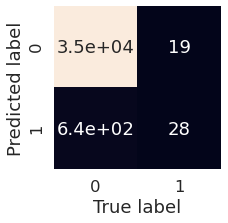

In [212]:
sns.set(font_scale=1.5)

def plot_confusion_mat(Y_test, Y_predict):
    """
    Plot a nice looking confusion matrix using seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(Y_test, Y_predict), 
                    annot = True,
                    cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')
    
    bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_confusion_mat(Y_test, y_pre)    

## Various ML algorithms for X_train and Y_tarin

In [213]:
# Function to compute confusion matrices for different ML algorithms using SMOTE upsample 

from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
from imblearn.over_sampling import SMOTE

np.random.seed(42)


Algorithms ={"XGBoost" : XGBClassifier,
          "Logisticregression " : LogisticRegression,
          "SVC" : SVC,
           "DecisionTree" : DecisionTreeClassifier,
           "RandomForest" : RandomForestClassifier}

def algorm(X_train, Y_train, X_test, Y_test):
    
#     sm = SMOTE(random_state=42)
#     x_upsam, y_upsam = sm.fit_sample(X_train, Y_train)

    for name, method in Algorithms.items():
        
        
        model = method()
        model1 = model.fit(X_train, Y_train)
        y_pred = model1.predict(X_test)
        print('confusion matrix for ' + name)
        print(pd.DataFrame(confusion_matrix(Y_test, y_pred)))
        print(metrics.classification_report(Y_test, y_pred))
    


algorm(X_train, Y_train, X_test, Y_test)




[11:43:41] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confusion matrix for XGBoost
       0   1
0  35081  45
1    627  45
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35126
           1       0.50      0.07      0.12       672

    accuracy                           0.98     35798
   macro avg       0.74      0.53      0.55     35798
weighted avg       0.97      0.98      0.97     35798

confusion matrix for Logisticregression 
       0  1
0  35122  4
1    664  8
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35126
           1       0.67      0.01      0.02       672

    accuracy                           0.98  

## Randomforest with various upsampling methods

In [34]:
# Function to test diff oversampling methods with Randomforest 
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import BorderlineSMOTE
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV


np.random.seed(42)

upsample = {'RandomOverSampler': RandomOverSampler , 
            'SMOTETomek': SMOTETomek, 
            'SMOTEENN' :SMOTEENN, 
            'SMOTE' : SMOTE, 
            'ADASYN': ADASYN,
             'BorderlineSMOTE':BorderlineSMOTE }

grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
       'max_depth' : [None, 5, 10, 20, 30],
       'max_features' : ['auto', 'sqrt'],
       'min_samples_split' : [2, 4, 6],
       'min_samples_leaf' : [1, 2, 4]}


def over_sample(x_train, y_train, x_test, y_test):
    # Looping methods
    for name, method in upsample.items():
        
        upsam = method()
        
        x_upsam, y_upsam = upsam.fit_resample(x_train, y_train)
        
        model = RandomForestClassifier().fit(x_upsam, y_upsam)
        
        # Setup RandomilzedSearchCV
#         rs_clf1 = RandomizedSearchCV(estimator = clf,
#                            param_distributions=grid,
#                            n_iter=20, # try 20 models total
#                            cv=5 # 5-fold cross-validation
#                              ).fit(x_upsam, y_upsam)

        
        y_pred = model.predict(x_test)
        
        
        print('confusion matrix for ' + str(name))
        print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)))
        print(metrics.classification_report(y_test, y_pred))
#         print(metrics.classification_report(y_test, y_pred_ros))
#         print('Accuracy {}'.format(metrics.accuracy_score(y_test, y_pred_ros)) )
#         print('Area under the curve {}'.format(metrics.roc_auc_score(y_test, y_pred_ros)))
        
        
over_sample(X_train, Y_train, X_test, Y_test)  

confusion matrix for RandomOverSampler
       0   1
0  35082  44
1    636  36
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35126
           1       0.45      0.05      0.10       672

    accuracy                           0.98     35798
   macro avg       0.72      0.53      0.54     35798
weighted avg       0.97      0.98      0.97     35798

confusion matrix for SMOTETomek
       0     1
0  32372  2754
1    341   331
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     35126
           1       0.11      0.49      0.18       672

    accuracy                           0.91     35798
   macro avg       0.55      0.71      0.57     35798
weighted avg       0.97      0.91      0.94     35798

confusion matrix for SMOTEENN
       0     1
0  31692  3434
1    299   373
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     35126
       

## various ML algorithms with SMOTEENN

In [35]:
sm = SMOTEENN(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)

rf = RandomForestClassifier()

rf.fit(X_upsam, Y_upsam)

y_pred_rf = rf.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, y_pred_rf)))
print(classification_report(Y_test, y_pred_rf))


       0     1
0  31732  3394
1    305   367
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     35126
           1       0.10      0.55      0.17       672

    accuracy                           0.90     35798
   macro avg       0.54      0.72      0.56     35798
weighted avg       0.97      0.90      0.93     35798



In [36]:
sm = SMOTEENN(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)

xgb = XGBClassifier()

xgb.fit(X_upsam, Y_upsam)

y_pred_xgb = xgb.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, y_pred_xgb)))
print(classification_report(Y_test, y_pred_xgb))


[13:56:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
       0     1
0  30160  4966
1    243   429
              precision    recall  f1-score   support

           0       0.99      0.86      0.92     35126
           1       0.08      0.64      0.14       672

    accuracy                           0.85     35798
   macro avg       0.54      0.75      0.53     35798
weighted avg       0.97      0.85      0.91     35798



In [ ]:
sm = SMOTEENN(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)

lr = LogisticRegression()

lr.fit(X_upsam, Y_upsam)

y_pred_lr = lr.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, y_pred_lr)))
print(classification_report(Y_test, y_pred_lr))


## RandomForest with SMOTETomek

In [17]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)

rf = RandomForestClassifier()

rf.fit(X_upsam, Y_upsam)

y_pred_rf = rf.predict(X_test)
print(pd.DataFrame(confusion_matrix(Y_test, y_pred_rf)))
print(classification_report(Y_test, y_pred_rf))
print('Accuracy {}'.format(metrics.accuracy_score(Y_test, y_pred_rf)) )
print('Area under the curve {}'.format(metrics.roc_auc_score(Y_test, y_pred_rf)))

       0     1
0  32365  2761
1    344   328
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     35126
           1       0.11      0.49      0.17       672

    accuracy                           0.91     35798
   macro avg       0.55      0.70      0.56     35798
weighted avg       0.97      0.91      0.94     35798

Accuracy 0.913263310799486
Area under the curve 0.7047462468446924


In [41]:
# check Important features
feature_importances_df = pd.DataFrame(
    {"feature": list(X_train.columns), "importance": rf.feature_importances_}
).sort_values("importance", ascending=False)

# Display
feature_importances_df

,feature,importance
11,precip_mean,0.209120
9,precip_max,0.154700
8,tcw_mean,0.079959
6,tcw_max,0.078376
7,tcw_min,0.073252
10,precip_min,0.071891
3,sp_max,0.066772
4,sp_min,0.066769
5,sp_mean,0.066266
0,temp_max,0.048692


## RandomForest Hyperparameter tuning

In [38]:
from sklearn.model_selection import RandomizedSearchCV

np.random.seed(42)

sm = SMOTEENN(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)

# Hyperparameter grid RandomizedSearchCV will search over
grid = {'n_estimators' : [10, 100, 200, 500, 1000, 1200],
       'max_depth' : [None, 5, 10, 20, 30],
       'max_features' : ['auto', 'sqrt'],
       'min_samples_split' : [2, 4, 6],
       'min_samples_leaf' : [1, 2, 4]}

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomilzedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                           param_distributions=grid,
                           n_iter=20, # try 20 models total
                           cv=5 # 5-fold cross-validation
                             ) 


# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_upsam, Y_upsam)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1), n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]})

In [39]:
# Make predictions with the best hyperparamters
rs_y_pred = rs_clf.predict(X_test)

print('confusion matrix')
print(pd.DataFrame(metrics.confusion_matrix(Y_test, rs_y_pred)))
print(metrics.classification_report(Y_test, rs_y_pred))
print('Accuracy {}'.format(metrics.accuracy_score(Y_test, rs_y_pred)) )
print('Area under the curve {}'.format(metrics.roc_auc_score(Y_test, rs_y_pred)))

confusion matrix
       0     1
0  31672  3454
1    292   380
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     35126
           1       0.10      0.57      0.17       672

    accuracy                           0.90     35798
   macro avg       0.54      0.73      0.56     35798
weighted avg       0.97      0.90      0.93     35798

Accuracy 0.8953572825297502
Area under the curve 0.7335722351914062


## XGBoost tuning 

In [67]:
sm = SMOTEENN(random_state=42)
X_upsam, Y_upsam = sm.fit_sample(X_train, Y_train)


param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4, cv=5)


model_grid = gsearch1.fit(X_upsam, Y_upsam)
# gsearch1.best_params_, gsearch1.best_score_

grid_pred = model_grid.predict(X_test)

print(confusion_matrix(Y_test, grid_pred))
print(pd.DataFrame(confusion_matrix(Y_test, grid_pred)))
print(classification_report(Y_test, grid_pred))

[16:57:37] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[[30733  4393]
 [  261   411]]
       0     1
0  30733  4393
1    261   411
              precision    recall  f1-score   support

           0       0.99      0.87      0.93     35126
           1       0.09      0.61      0.15       672

    accuracy                           0.87     35798
   macro avg       0.54      0.74      0.54     35798
weighted avg       0.97      0.87      0.91     35798

